array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109112790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109888b10>]], dtype=object)

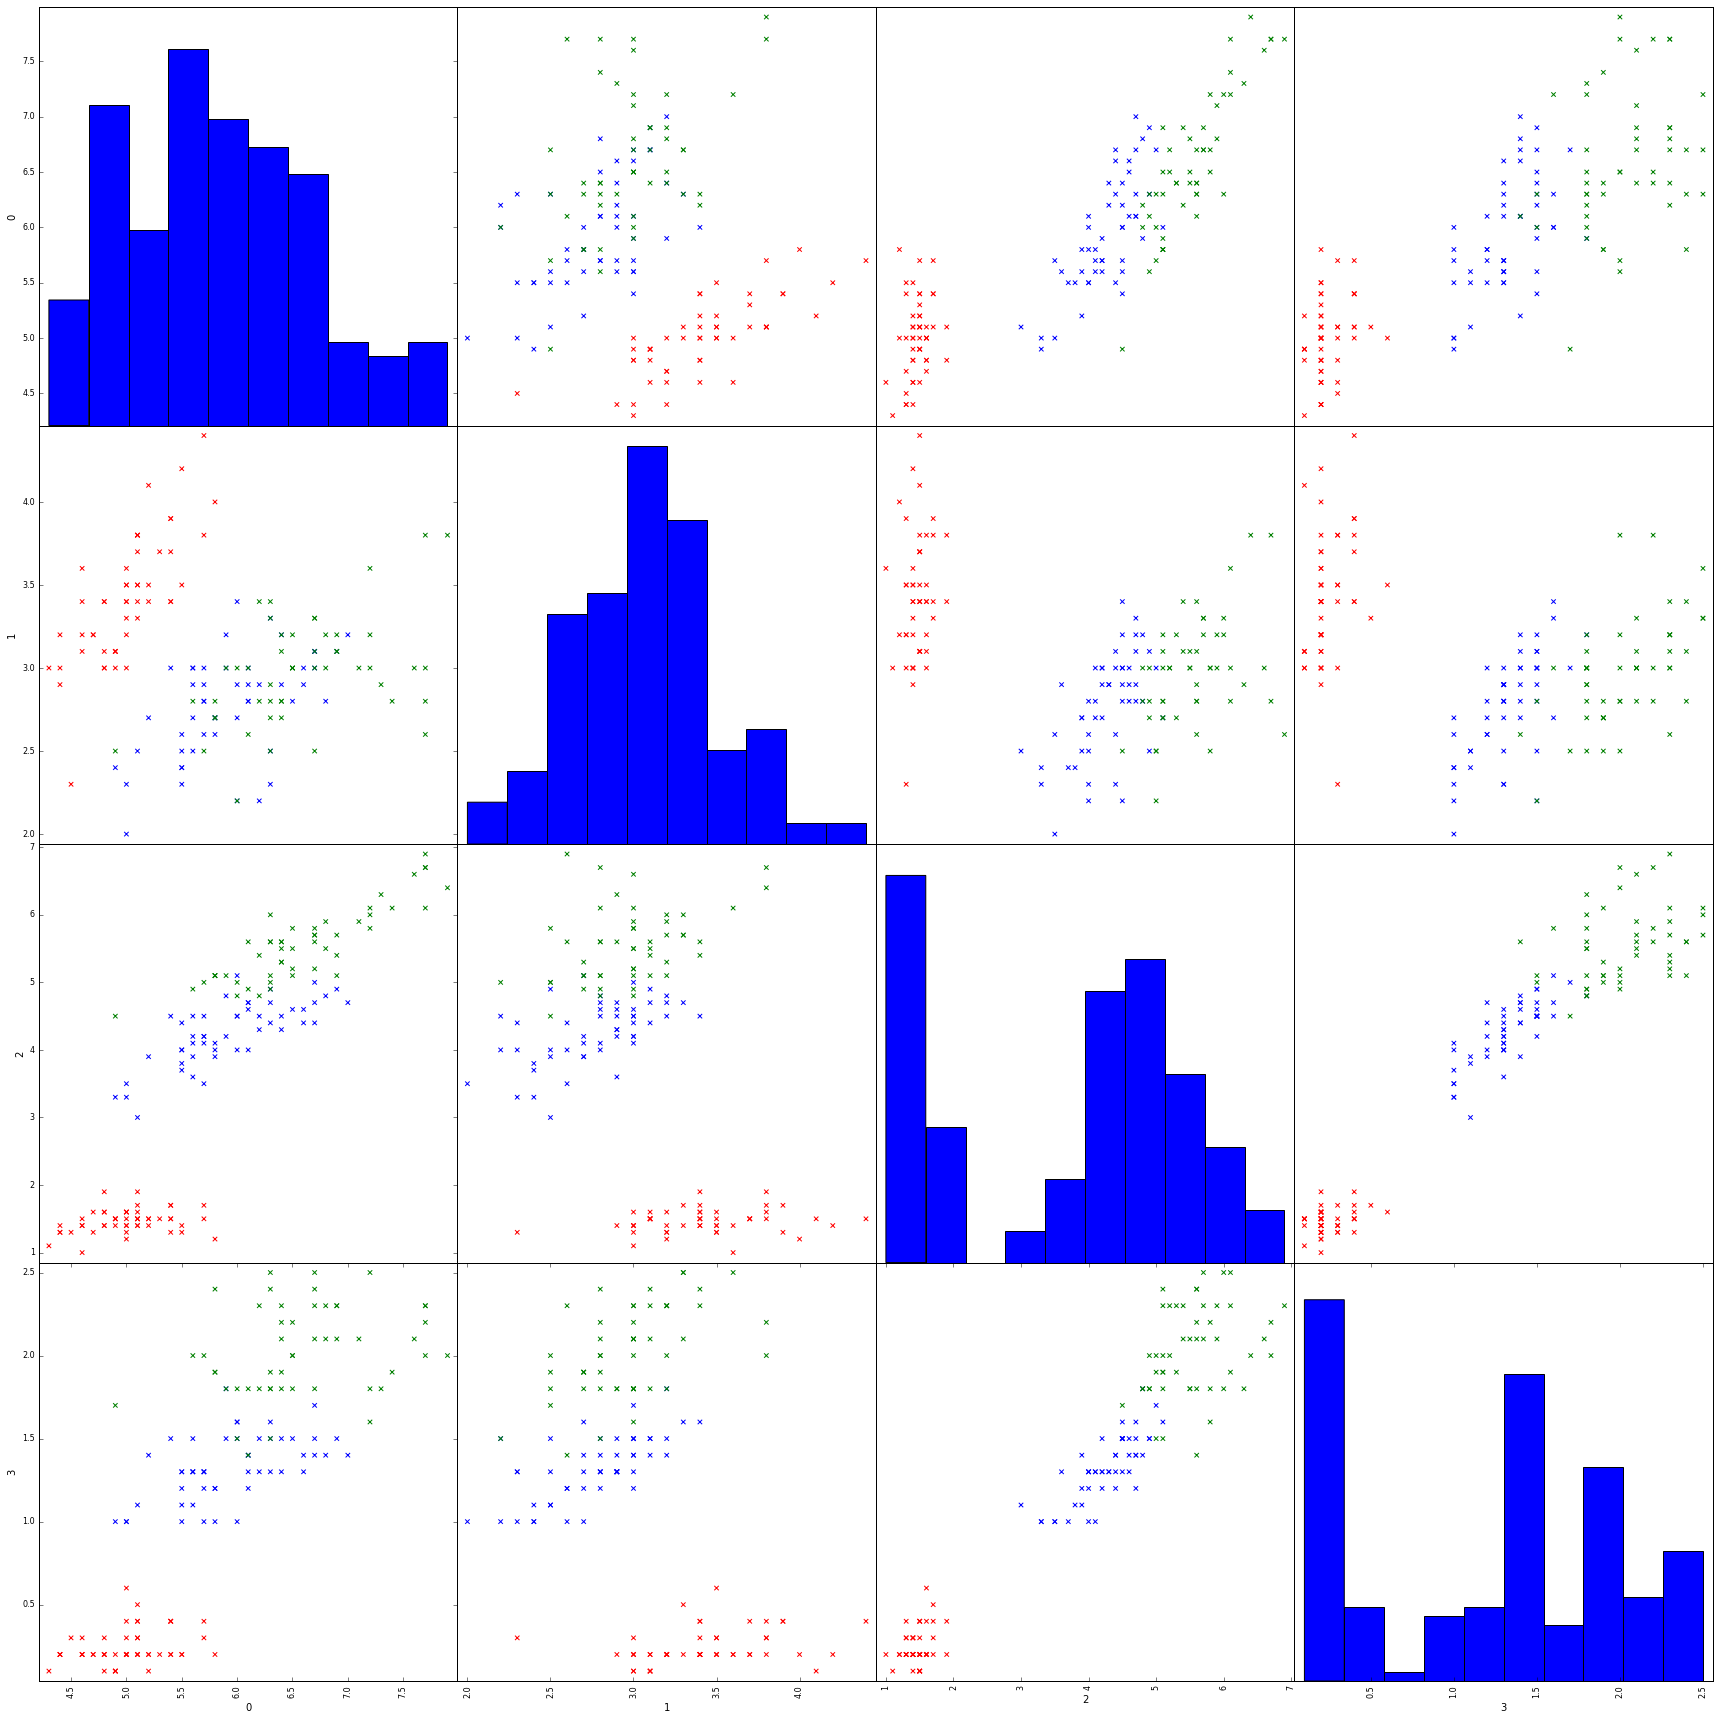

In [1]:
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression as PLS
import numpy as np
%matplotlib inline

df = pd.read_csv("iris.data.txt", sep=",", skipinitialspace=True, skiprows=0, header=None)
colors = {"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"green"}
shapes = {"Iris-setosa":"x","Iris-versicolor":"o","Iris-virginica":"^"}
number_map = {"Iris-setosa": 0,"Iris-versicolor": 1  ,"Iris-virginica": 2 }
scatter_matrix(df, alpha=1, figsize=(30,30), marker='x', c=df[4].apply(lambda x: colors[x]))


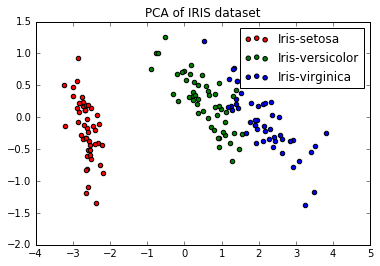

In [2]:
pca = PCA(n_components=2)
X = df.as_matrix()[:, :4]
y = df.as_matrix()[:,4]
X_r = pca.fit(X).transform(X)
target_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

plt.figure()
for c, i, target_name in zip("rgb", ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.show()

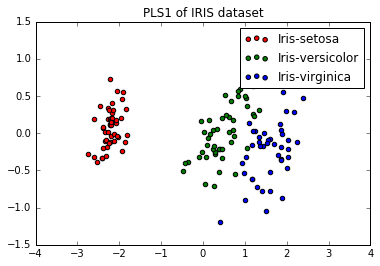

In [3]:
PLS1 = PLS(n_components=2)
X = df.as_matrix()[:, :4]
y = np.array(map(lambda x : number_map[x],df.as_matrix()[:, 4]))
string_map = {-1.2206555615733703 : "Iris-setosa", 0 : "Iris-versicolor", 1.2206555615733703 : "Iris-virginica"}

result = PLS1.fit_transform(X,y)
y = np.array(map(lambda x : string_map[x],result[1]))
target_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for c, i, target_name in zip("rgb", ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], target_names):
    plt.scatter(result[0][y == i, 0],result[0][y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PLS1 of IRIS dataset')
plt.show()

In [4]:
PLS2 = PLS(n_components=2)
X = df.as_matrix()[:, :4]
y = np.array(map(lambda x : number_map[x],df.as_matrix()[:, 4]))
one_hot_y = np.zeros((len(y),3))
one_hot_y[np.arange(len(y)),y] = 1


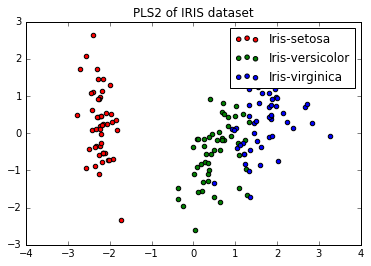

In [5]:
result = PLS2.fit_transform(X,one_hot_y)
target_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(result[0][y == i, 0],result[0][y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PLS2 of IRIS dataset')
plt.show()